In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

import os
from dotenv import load_dotenv

load_dotenv(os.path.join('.env'))

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

FRED_KEY = os.environ.get("FRED_KEY")

### 1. Create The FRED Object

In [80]:
fred = Fred(api_key = FRED_KEY)

### 2. Search for economic data

In [81]:
sp_search = fred.search('S&P', order_by='popularity')

In [82]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-28,2024-06-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-27 08:45:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-28,2024-06-28,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-28,2024-06-28,S&P 500,2014-06-30,2024-06-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-27 19:56:53-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-28,2024-06-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-28,2024-06-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-27 08:45:12-05:00,82,This data represents the effective yield of th...


### 3. Pull Raw Data

<Axes: title={'center': 'S&P 500'}>

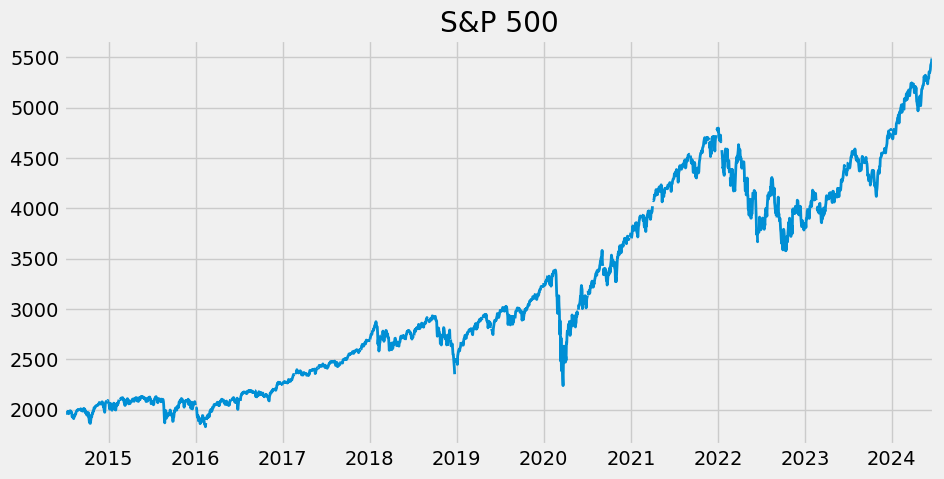

In [83]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

#### 2014-06-27	- 1$ = 183,5 тенге
### 1 S&P = 1960$ = 359 000 тенге

## 10 years later

#### 2024-06-26 - 1$ = 465,13 тенге
### 1 S&P = 5477.90$ = 2 547 935 тенге



### 4. Pull and Join Multiple Data Series

In [84]:
unemp_results=fred.search('unemployment')

In [85]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape